<a href="https://colab.research.google.com/github/Prognosticators/price_predictor/blob/main/src/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Defining Libraries used

In [2]:
from google.colab import files 
uploaded = files.upload()
#Uploading raw data sets

Saving Train_dataset.csv to Train_dataset.csv


In [3]:
from google.colab import files 
uploaded = files.upload()
#Uploading raw data sets

Saving test_dataset.csv to test_dataset.csv


In [4]:
train = pd.read_csv("Train_dataset.csv")
test = pd.read_csv("test_dataset.csv")
#Reading the uploaded data sets

In [64]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,10400,1,3,3,0,0,0,5,2,2,0,5,7,5,1998,1998,1,0,12,13,2,0.0,3,4,2,2,3,0,5,0,5,0,866,866,1,0,1,4,913,0,1779,0,0,2,1,3,1,2,6,0,1,1,2,4,4,2,198,36,0,0,0,0,0,3,2009,8,4,12.195517
1,50,4,6000,1,3,3,0,0,0,3,2,2,0,0,5,8,1925,1997,1,0,13,14,2,0.0,3,4,0,3,3,3,5,0,5,0,884,884,1,0,1,4,464,0,1348,1,0,1,0,3,1,3,6,1,5,2,1,4,4,0,0,0,208,0,0,0,0,5,2009,8,4,11.669929
2,20,3,9750,1,3,3,0,4,0,5,2,2,0,2,7,5,2000,2001,1,0,12,13,1,171.0,2,4,2,2,3,3,5,0,5,0,1630,1630,1,0,1,4,0,0,1630,0,0,2,0,3,1,2,6,1,1,2,2,4,4,2,74,234,0,0,0,0,0,10,2009,8,4,12.269047
3,20,3,10140,1,3,3,0,4,0,14,2,2,0,2,5,6,1975,1975,1,0,6,6,2,0.0,3,4,1,2,3,3,0,788,5,0,268,1056,1,0,1,4,0,0,1074,1,0,1,1,3,1,3,6,0,1,1,2,4,4,2,0,88,0,0,0,0,0,7,2006,8,4,11.941456
4,20,3,14684,1,0,3,0,1,0,20,2,2,0,2,7,7,1990,1991,3,0,6,6,1,234.0,2,4,1,2,3,2,0,485,1,177,1496,2158,1,2,1,4,0,0,2196,0,0,2,0,3,1,2,6,1,1,1,3,4,4,2,84,70,0,0,0,0,0,6,2009,8,4,12.513190


In [5]:
train.head()
#For printing whole data set

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,1,2,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,1,1,2,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,1,2,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,5,2,3,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,1,3,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216


In [6]:
train = train.drop(["Unnamed: 0", "Id"], axis = 1)
test = test.drop(["Unnamed: 0", "Id"], axis = 1)
#Basicsally dropping first two coloumns
#https://www.w3resource.com/pandas/dataframe/dataframe-drop.php

In [7]:
train.head()
#Output after dropping first two unwanted coloumns


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,1,2,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,1,1,2,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,1,2,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,5,2,3,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,1,3,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,12.429216


In [8]:
train_data = train.values
#".values" fuctionality :-
#https://www.geeksforgeeks.org/python-dictionary-values/
#Basically to transfer all the values of the "train" dataset into the train_data variable 

X = train_data[:, :-1]
#To gather all the independent data set paranmeteres into "X" variables in form of an array.
#Here [x,y] means the [rows,coloumns]
#[:,:-1] means all rows and all the coloumns till -1th coloumn where -1th coloumn indicates the last coloumn "SalePrice"

Y = train_data[:, -1].reshape(train_data.shape[0],1)
#To gather the dependent data set parameter (SalePrice) into "Y" variables in form of an array.
#Here [:, -1] means all the rows and -1th coloumn (SalePrice)
#".reshape" is used to reshape the array 
#Here without reshape the output array is in the dim of (1,1200) but we need it in dim of (1200,1)
#So the "train_data.shape[0]" command specifies the number of row in the 0th coloumn (1200)
#So basically here reshape transposes the array  



In [60]:
Y.size

1200

In [13]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0],1)
X_test = test_data[:, :-1]
#Separating Dependant and independant variable in the test data-set same as train

In [11]:
X

array([[6.0000e+01, 3.0000e+00, 8.4500e+03, ..., 2.0080e+03, 8.0000e+00,
        4.0000e+00],
       [2.0000e+01, 3.0000e+00, 9.6000e+03, ..., 2.0070e+03, 8.0000e+00,
        4.0000e+00],
       [6.0000e+01, 3.0000e+00, 1.1250e+04, ..., 2.0080e+03, 8.0000e+00,
        4.0000e+00],
       ...,
       [2.0000e+01, 3.0000e+00, 9.1000e+03, ..., 2.0090e+03, 8.0000e+00,
        4.0000e+00],
       [2.0000e+01, 3.0000e+00, 1.1235e+04, ..., 2.0060e+03, 8.0000e+00,
        4.0000e+00],
       [2.0000e+01, 3.0000e+00, 9.3530e+03, ..., 2.0060e+03, 7.0000e+00,
        0.0000e+00]])

In [12]:
X.T
#".T" functionallity is basically used for transposing elements

array([[6.0000e+01, 2.0000e+01, 6.0000e+01, ..., 2.0000e+01, 2.0000e+01,
        2.0000e+01],
       [3.0000e+00, 3.0000e+00, 3.0000e+00, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [8.4500e+03, 9.6000e+03, 1.1250e+04, ..., 9.1000e+03, 1.1235e+04,
        9.3530e+03],
       ...,
       [2.0080e+03, 2.0070e+03, 2.0080e+03, ..., 2.0090e+03, 2.0060e+03,
        2.0060e+03],
       [8.0000e+00, 8.0000e+00, 8.0000e+00, ..., 8.0000e+00, 8.0000e+00,
        7.0000e+00],
       [4.0000e+00, 4.0000e+00, 4.0000e+00, ..., 4.0000e+00, 4.0000e+00,
        0.0000e+00]])

In [42]:
X.shape[0]
#this is used for knowing the number of row 
X.shape[1]
#this is used for knowing the number of coloumns


70

In [32]:
Q = np.vstack((np.ones((X.shape[0], )), X.T))
X = Q.T
#"np.vstack" is used for stacking two arrays (vertically)
#https://www.youtube.com/watch?v=ksqPbrS-b78
#here we r stacking the array of only ones and the the transpose of X
#The last outcome we want is to have a coloumn of only ones before the main X array 
#So basicxally we are first stacking that coloumn of ones first with the transposed X and then again transposing the outcome


In [33]:
X

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       [1.000e+00, 2.000e+01, 3.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.000e+00, 2.000e+01, 3.000e+00, ..., 2.009e+03, 8.000e+00,
        4.000e+00],
       [1.000e+00, 2.000e+01, 3.000e+00, ..., 2.006e+03, 8.000e+00,
        4.000e+00],
       [1.000e+00, 2.000e+01, 3.000e+00, ..., 2.006e+03, 7.000e+00,
        0.000e+00]])

In [34]:
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T
#Same as X for X_test

In [35]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of X_test :", Y_test.shape)


Shape of X_train : (1200, 70)
Shape of Y_train : (1200, 1)
Shape of X_test : (258, 70)
Shape of X_test : (258, 1)


In [46]:
def model(X, Y, learning_rate, iteration):
  #learning_rate -> alpha
  #iteration -> basically how many times we want to run the loop

  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []


  for i in range(iteration):

    y_pred = np.dot(X, theta)

    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))

    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta

    cost_list.append(cost)

    if(i%(iteration/10) == 0):
      print("Cost is :", cost)

  return theta, cost_list



In [61]:
iteration = 100
learning_rate = 0.000000005
theta, cost_list = model (X, Y, learning_rate = learning_rate, iteration = iteration)

Cost is : 72.3753936382174
Cost is : 15.584715697023743
Cost is : 7.373608905745666
Cost is : 3.5418400809359425
Cost is : 1.7522794641091886
Cost is : 0.91510115811056
Cost is : 0.522107622195145
Cost is : 0.3363195867756381
Cost is : 0.24722921927756936
Cost is : 0.20330345638615213


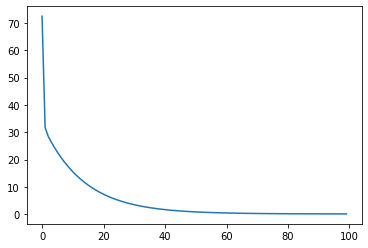

In [62]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [57]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [63]:
y_pred

array([[12.13081277],
       [11.78416687],
       [12.26869551],
       [11.85455821],
       [12.64615829],
       [11.83736935],
       [12.34351094],
       [11.84762003],
       [12.46287223],
       [12.22814292],
       [12.08082658],
       [11.44518768],
       [11.71900967],
       [11.75515749],
       [11.62939317],
       [11.83225523],
       [12.17643411],
       [11.3187897 ],
       [11.74479967],
       [11.64281743],
       [11.7856201 ],
       [12.03580242],
       [12.46437707],
       [12.09222654],
       [11.68159588],
       [12.2379439 ],
       [11.80759017],
       [12.54275712],
       [11.95175284],
       [12.59983199],
       [11.86785269],
       [11.48853022],
       [11.91702743],
       [11.95580154],
       [11.85374481],
       [12.03991119],
       [12.21156352],
       [11.93470311],
       [12.21441   ],
       [12.20281897],
       [12.29975554],
       [11.9120823 ],
       [12.73592599],
       [11.76269318],
       [12.08601074],
       [12

In [59]:
print("Test error is:", round(error,4)*100, "%")
print("Test Accuracy is:", round(1-error,4)*100, "%")

Test error is: 12.959999999999999 %
Test Accuracy is: 87.03999999999999 %
